In [1]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline
import pathlib
from datetime import datetime
import math
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




In [2]:
df=pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/resrc/data/8-feat-eng/feat-lag.csv')

In [3]:
df.head()

,Unnamed: 0,index,datetime,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,date,month,year,demand_rolling_mean_3,demand_rolling_std_7,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,demand_lag_1,rel_hum_lag_1,wind_speed_lag_1,demand_lag_2,rel_hum_lag_2,wind_speed_lag_2,demand_lag_3,rel_hum_lag_3,wind_speed_lag_3,demand_lag_4,rel_hum_lag_4,wind_speed_lag_4,demand_lag_5,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1,1,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.025000,11.691667
1,1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,2,1,1994,NaN,NaN,NaN,NaN,NaN,NaN,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-647.735069,-155.586979
2,2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,3,1,1994,16477.083333,NaN,NaN,NaN,NaN,NaN,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-974.315625,-222.820833
3,3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,4,1,1994,17952.250000,NaN,NaN,NaN,NaN,NaN,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-731.763889,-253.618056
4,4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,5,1,1994,19085.541667,NaN,NaN,NaN,NaN,NaN,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.0,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-840.061111,-271.450000


In [4]:
df.drop(columns=['Unnamed: 0', 'index'], inplace = True)

In [5]:
df.index

RangeIndex(start=0, stop=9131, step=1)

In [6]:
df = df.set_index('datetime')

In [8]:
df = df.dropna()

In [10]:
df.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,date,month,year,demand_rolling_mean_3,demand_rolling_std_7,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,demand_lag_1,rel_hum_lag_1,wind_speed_lag_1,demand_lag_2,rel_hum_lag_2,wind_speed_lag_2,demand_lag_3,rel_hum_lag_3,wind_speed_lag_3,demand_lag_4,rel_hum_lag_4,wind_speed_lag_4,demand_lag_5,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-01-08,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,-17.718462,-15.0,-9.5,-13.225000,-14.10,-17.8,-10.7,-15.316667,-16.45,78.0,92.0,84.333333,84.0,1.6,25.0,10.654167,9.7,98.97,99.81,99.271667,99.190,-19.704437,-13.544552,-17.718462,-18.662419,8,1,1994,19607.930556,1495.271012,-12.523214,2.684410,77.184524,4.508663,20053.000000,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,-1115.308333,-212.151042
1994-01-09,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,-22.771558,-21.8,-12.2,-17.804167,-18.50,-26.3,-17.6,-22.325000,-22.40,56.0,76.0,68.083333,69.5,24.1,40.2,31.295833,25.0,99.91,101.71,100.806667,100.840,-26.945633,-17.004725,-22.771558,-23.458662,9,1,1994,18843.916667,815.105711,-13.823214,2.729764,76.279762,5.648137,18435.000000,84.333333,16.041667,20053.000000,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,-1212.167014,-136.498611
1994-01-10,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,-19.501955,-24.8,-5.2,-14.858333,-15.60,-30.1,-9.1,-18.841667,-20.00,56.0,93.0,71.916667,71.5,4.0,25.0,20.783333,25.0,100.67,102.07,101.655000,101.810,-30.064700,-9.069644,-19.501955,-20.441878,10,1,1994,18732.222222,836.029569,-14.144048,2.695514,75.517857,5.851502,18043.750000,68.083333,7.666667,18435.000000,84.333333,16.041667,20053.000000,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,-1068.561806,-159.727083
1994-01-11,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,-6.155133,-10.0,1.3,-2.879167,-3.05,-13.4,-1.4,-5.737500,-4.95,69.0,94.0,80.791667,81.5,3.2,25.0,14.887500,14.5,100.17,100.84,100.441250,100.390,-14.326526,-1.410459,-6.155133,-6.322421,11,1,1994,18781.986111,874.363676,-13.150595,4.915985,76.428571,6.140509,19717.916667,71.916667,10.750000,18043.750000,68.083333,7.666667,18435.000000,84.333333,16.041667,20053.000000,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,-232.612674,-46.186632
1994-01-12,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,-11.569206,-16.1,-0.7,-7.758333,-7.20,-17.3,-1.8,-9.816667,-9.60,73.0,93.0,85.291667,86.0,6.4,25.0,17.291667,16.1,98.87,100.77,99.892083,100.025,-20.768405,-3.281749,-11.569206,-11.104928,12,1,1994,18936.152778,912.278464,-12.563690,5.323192,78.500000,6.363688,18584.291667,80.791667,16.041667,19717.916667,71.916667,10.750000,18043.750000,68.083333,7.666667,18435.000000,84.333333,16.041667,20053.000000,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333

In [14]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['daily_demand'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49930.902, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50482.319, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50476.891, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50465.938, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50480.323, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49929.931, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=49971.068, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50063.307, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=49932.046, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=49933.075, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49929.022, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=50216.562, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49930.804, Time=0.98 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=50144.876, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0

In [15]:
# Defining the train-test split point
split_point = int(len(df) * 0.8)  # 80% for training, 20% for testing

In [16]:
train, test = df[:split_point], df[split_point:]


In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['daily_demand'],order=(4,1,5))
model=model.fit()
model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_demand   No. Observations:                 2435
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -19966.690
Date:                Tue, 16 Jul 2024   AIC                          39953.379
Time:                        19:17:05   BIC                          40011.352
Sample:                             0   HQIC                         39974.455
                               - 2435                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4600      0.056      8.220      0.000       0.350       0.570
ar.L2         -1.0830      0.044    -24.415      0.000      -1.170      -0.996
ar.L3          0.4357      0.054      7.998      0.000       0.329       0.542
ar.L4         -0.6110      0.033    -18.429      0.000      -0.676      -0.546
ma.L1         -0.6714      0.059    -11.355      0.000      -0.787      -0.555
ma.L2          0.8506      0.057     14.951      0.000       0.739       0.962
ma.L3         -0.6372      0.056    -11.477      0.000      -0.746      -0.528
ma.L4          0.3721      0.048      7.810      0.000       0.279       0.466
ma.L5         -0.1224      0.033     -3.700      0.000      -0.187      -0.058
sigma2      7.978e+05   2.12e+04     37.552      0.000    7.56e+05    8.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                47.41
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.00
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='datetime'>

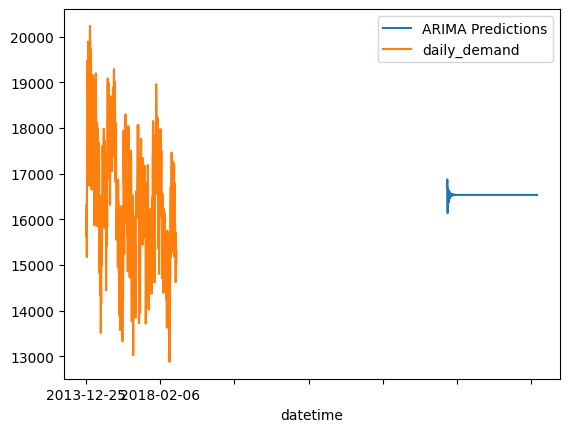

In [27]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['daily_demand'].plot(legend=True)

In [21]:
predictions = model.forecast(steps=len(test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
from sklearn.metrics import mean_squared_error, r2_score


r2 = r2_score(test, predictions)

ValueError: y_true and y_pred have different number of output (65!=1)

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['daily_demand'].mean()
rmse=sqrt(mean_squared_error(pred,test['daily_demand']))
print(rmse)

1351.1188664488989
